
For a real-valued matrix \(A\):

$$
A \in \mathbb{R}^{n\times n}
$$

- Any **non-real** eigenvalue must appear with its complex conjugate.
- But \(A\) can also have **real** eigenvalues.

So the spectrum is generally:

$$
\{\lambda_1,\dots,\lambda_n\}
=
\{\text{real eigenvalues}\}
\;\cup\;
\{\mu_1,\overline{\mu_1},\mu_2,\overline{\mu_2},\dots\}.
$$

Example: a real \(3\times 3\) matrix could have eigenvalues

$$
\{2,\;0.7+0.4i,\;0.7-0.4i\}.
$$

So: **complex ones come in conjugate pairs, but not all eigenvalues must be complex (can be real valued).**

A shape: (30, 30)
Number of eigenvalues: 30
First 8 eigenvalues:
lambda_1 = -5.6358 + 0.6071j
lambda_2 = -5.6358 + -0.6071j
lambda_3 = 6.0810 + 0.0000j
lambda_4 = -0.1474 + 5.1777j
lambda_5 = -0.1474 + -5.1777j
lambda_6 = 2.5965 + 4.6687j
lambda_7 = 2.5965 + -4.6687j
lambda_8 = -2.5971 + 3.8163j


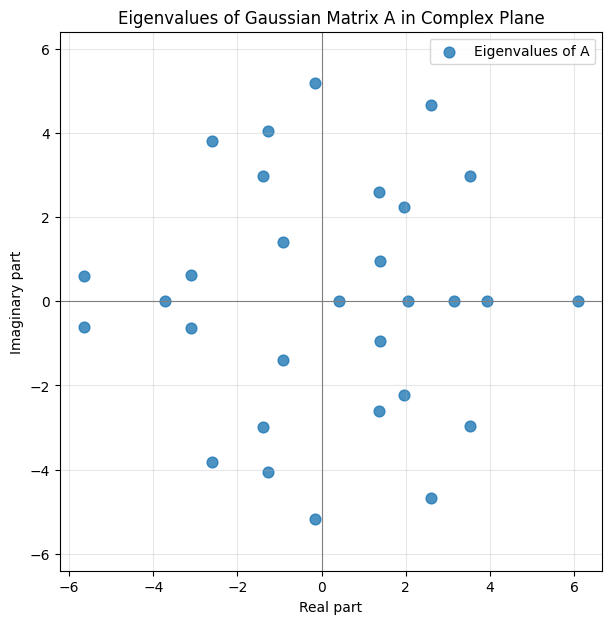

In [8]:
#
# This example shows how eigenvalues of a Gaussian random matrix are distributed in the complex plane.
# Eigenvalues are complex numbers but come in conjugate pairs, so we expect to see them 
# symmetrically distributed around the real axis.
#

import numpy as np
import matplotlib.pyplot as plt

# 1) Create a Gaussian random matrix A

n = 30               # matrix size
A = np.random.randn(n, n)

# 2) Compute eigenvalues of A
eigvals = np.linalg.eigvals(A)

print(f"A shape: {A.shape}")
print(f"Number of eigenvalues: {eigvals.shape[0]}")
print("First 8 eigenvalues:")
for i, lam in enumerate(eigvals[:8]):
    print(f"lambda_{i+1} = {lam.real:.4f} + {lam.imag:.4f}j")

# 3) Plot eigenvalues in the complex plane
plt.figure(figsize=(7, 7))
plt.scatter(eigvals.real, eigvals.imag, s=60, alpha=0.8, label='Eigenvalues of A')
plt.axhline(0, color='gray', linewidth=0.8)
plt.axvline(0, color='gray', linewidth=0.8)
plt.xlabel('Real part')
plt.ylabel('Imaginary part')
plt.title('Eigenvalues of Gaussian Matrix A in Complex Plane')
plt.grid(True, alpha=0.3)
plt.legend()
plt.axis('equal')
plt.show()

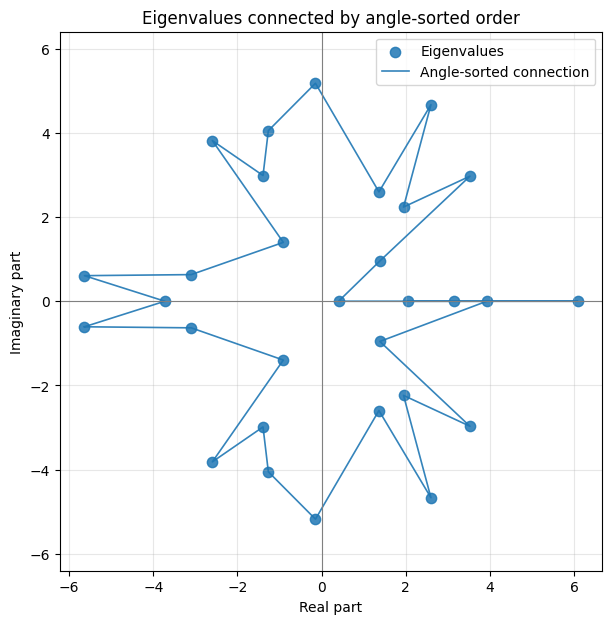

In [9]:
# 4) Connect eigenvalues by angle-sorted order around centroid
z = eigvals
center = np.mean(z)
angles = np.angle(z - center)
idx = np.argsort(angles)
z_sorted = z[idx]

# Close loop for visualization
z_loop = np.r_[z_sorted, z_sorted[:1]]

plt.figure(figsize=(7, 7))
plt.scatter(z.real, z.imag, s=55, alpha=0.85, label='Eigenvalues')
plt.plot(z_loop.real, z_loop.imag, '-', lw=1.2, alpha=0.9, label='Angle-sorted connection')

plt.axhline(0, color='gray', linewidth=0.8)
plt.axvline(0, color='gray', linewidth=0.8)
plt.xlabel('Real part')
plt.ylabel('Imaginary part')
plt.title('Eigenvalues connected by angle-sorted order')
plt.grid(True, alpha=0.3)
plt.axis('equal')
plt.legend()
plt.show()

Conjugate pairs found: 12
Real eigenvalues found: 6


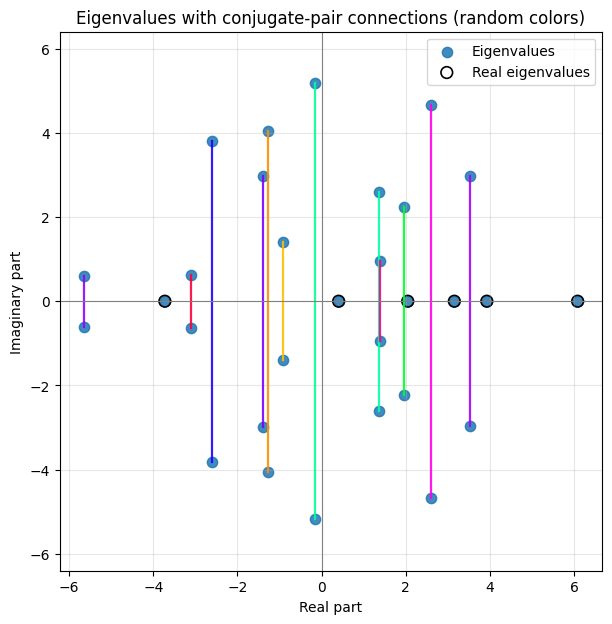

In [10]:
# 5) Connect conjugate eigenvalue pairs explicitly
# For a real matrix A, non-real eigenvalues should appear in conjugate pairs.

z = eigvals
tol = 1e-8
used = np.zeros(len(z), dtype=bool)
pairs = []
real_idx = []

for i in range(len(z)):
    if used[i]:
        continue

    if abs(z[i].imag) < tol:
        real_idx.append(i)
        used[i] = True
        continue

    target = np.conj(z[i])
    candidates = [j for j in range(len(z)) if (not used[j]) and j != i]
    if not candidates:
        used[i] = True
        continue

    j = min(candidates, key=lambda k: abs(z[k] - target))
    if abs(z[j] - target) < 1e-6:
        pairs.append((i, j))
        used[i] = True
        used[j] = True
    else:
        used[i] = True

print(f'Conjugate pairs found: {len(pairs)}')
print(f'Real eigenvalues found: {len(real_idx)}')

plt.figure(figsize=(7, 7))
plt.scatter(z.real, z.imag, s=55, alpha=0.85, label='Eigenvalues')

# Draw line segments between conjugate pairs with random colors
rng = np.random.default_rng(42)
line_colors = plt.cm.hsv(rng.random(len(pairs)))
for (i, j), c in zip(pairs, line_colors):
    plt.plot([z[i].real, z[j].real], [z[i].imag, z[j].imag],
             color=c, lw=1.6, alpha=0.9)

# Highlight real eigenvalues (imag ~ 0)
if real_idx:
    plt.scatter(z[real_idx].real, z[real_idx].imag, s=70,
                facecolors='none', edgecolors='black', linewidths=1.2,
                label='Real eigenvalues')

plt.axhline(0, color='gray', linewidth=0.8)
plt.axvline(0, color='gray', linewidth=0.8)
plt.xlabel('Real part')
plt.ylabel('Imaginary part')
plt.title('Eigenvalues with conjugate-pair connections (random colors)')
plt.grid(True, alpha=0.3)
plt.axis('equal')
plt.legend()
plt.show()

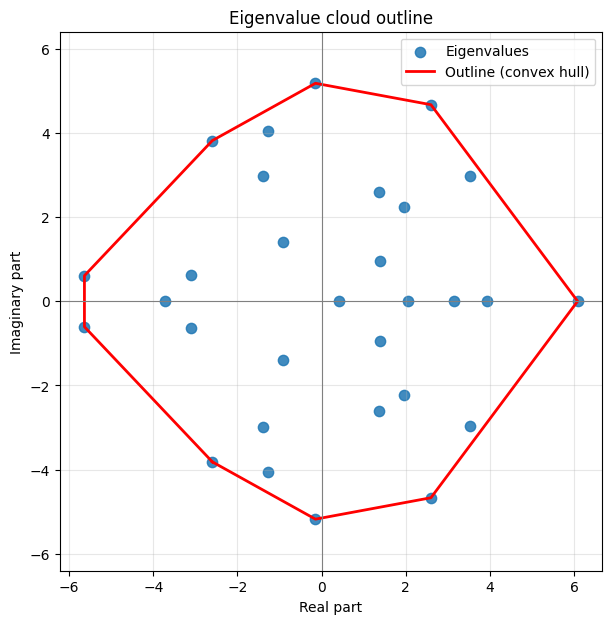

In [11]:
# 6) Connect dots to form an outer outline (convex hull)
# This draws the boundary enclosing the eigenvalue cloud.

import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull

z = eigvals
pts = np.column_stack([z.real, z.imag])

# Compute convex hull of the points in the complex plane
hull = ConvexHull(pts)
hull_vertices = hull.vertices

# Close the loop
hull_closed = np.r_[hull_vertices, hull_vertices[0]]

plt.figure(figsize=(7, 7))
plt.scatter(pts[:, 0], pts[:, 1], s=55, alpha=0.85, label='Eigenvalues')
plt.plot(pts[hull_closed, 0], pts[hull_closed, 1], 'r-', lw=2.0, label='Outline (convex hull)')

plt.axhline(0, color='gray', linewidth=0.8)
plt.axvline(0, color='gray', linewidth=0.8)
plt.xlabel('Real part')
plt.ylabel('Imaginary part')
plt.title('Eigenvalue cloud outline')
plt.grid(True, alpha=0.3)
plt.axis('equal')
plt.legend()
plt.show()

A^T A eigenvalues: 30
A A^T eigenvalues: 30


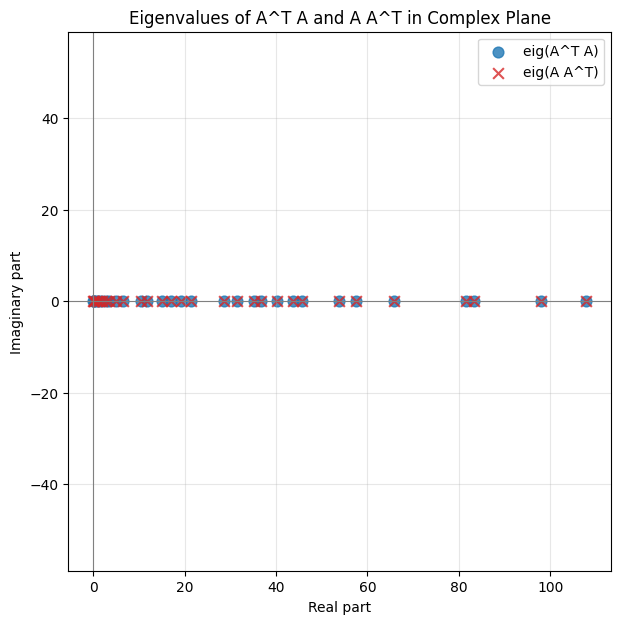

In [13]:
# 7) Eigenvalues of A^T A and A A^T in the complex plane
AtA = A.T @ A
AAt = A @ A.T

eig_AtA = np.linalg.eigvals(AtA)
eig_AAt = np.linalg.eigvals(AAt)

print(f"A^T A eigenvalues: {eig_AtA.shape[0]}")
print(f"A A^T eigenvalues: {eig_AAt.shape[0]}")

plt.figure(figsize=(7, 7))
plt.scatter(
    eig_AtA.real,
    eig_AtA.imag,
    s=60,
    alpha=0.8,
    color="tab:blue",
    marker="o",
    label="eig(A^T A)",
)
plt.scatter(
    eig_AAt.real,
    eig_AAt.imag,
    s=60,
    alpha=0.8,
    color="tab:red",
    marker="x",
    label="eig(A A^T)",
)
plt.axhline(0, color="gray", linewidth=0.8)
plt.axvline(0, color="gray", linewidth=0.8)
plt.xlabel("Real part")
plt.ylabel("Imaginary part")
plt.title("Eigenvalues of A^T A and A A^T in Complex Plane")
plt.grid(True, alpha=0.3)
plt.axis("equal")
plt.legend()
plt.show()

